#Imports + Load Data

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the raw dataset
data = pd.read_csv("/content/malnutrition_raw_csv.csv")
data = data.dropna()


In [10]:
import os

# Create folder for processed data
os.makedirs('data/processed', exist_ok=True)

# Save cleaned data
data.to_csv('data/processed/malnutrition_clean.csv', index=False)

#Basic Exploration


In [11]:
# Preview data
print(data.head())

# Data types
print("\nData types:\n", data.dtypes)

# Missing values
print("\nMissing values:\n", data.isnull().sum())

# Summary statistics
print("\nDescriptive stats:\n", data.describe())



   age_months  gender  weight_kg  height_cm  muac_cm  recent_illness  \
0          44    Male       12.4       89.4     14.6               0   
1          57  Female       12.0       98.3     12.8               0   
2          34  Female       11.8       97.2     14.5               1   
3          20    Male       14.4       86.1     14.6               0   
5          13    Male       13.7      105.4     11.8               0   

  immunization_status nutrition_status  
0            Complete           Normal  
1            Complete          At Risk  
2            Complete           Normal  
3            Complete           Normal  
5             Partial          At Risk  

Data types:
 age_months               int64
gender                  object
weight_kg              float64
height_cm              float64
muac_cm                float64
recent_illness           int64
immunization_status     object
nutrition_status        object
dtype: object

Missing values:
 age_months             0
ge

#Target Variable Distribution




Nutrition Status Distribution:
 nutrition_status
Normal          471
At Risk         343
Malnourished     96
Name: count, dtype: int64


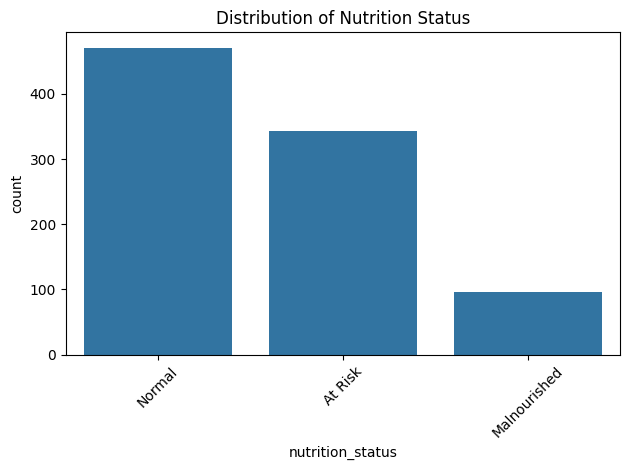

In [12]:
# Check distribution of the target variable
print("\nNutrition Status Distribution:\n", data['nutrition_status'].value_counts())

# Plot
sns.countplot(data=data, x='nutrition_status')
plt.title('Distribution of Nutrition Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Histograms for Numerical Columns

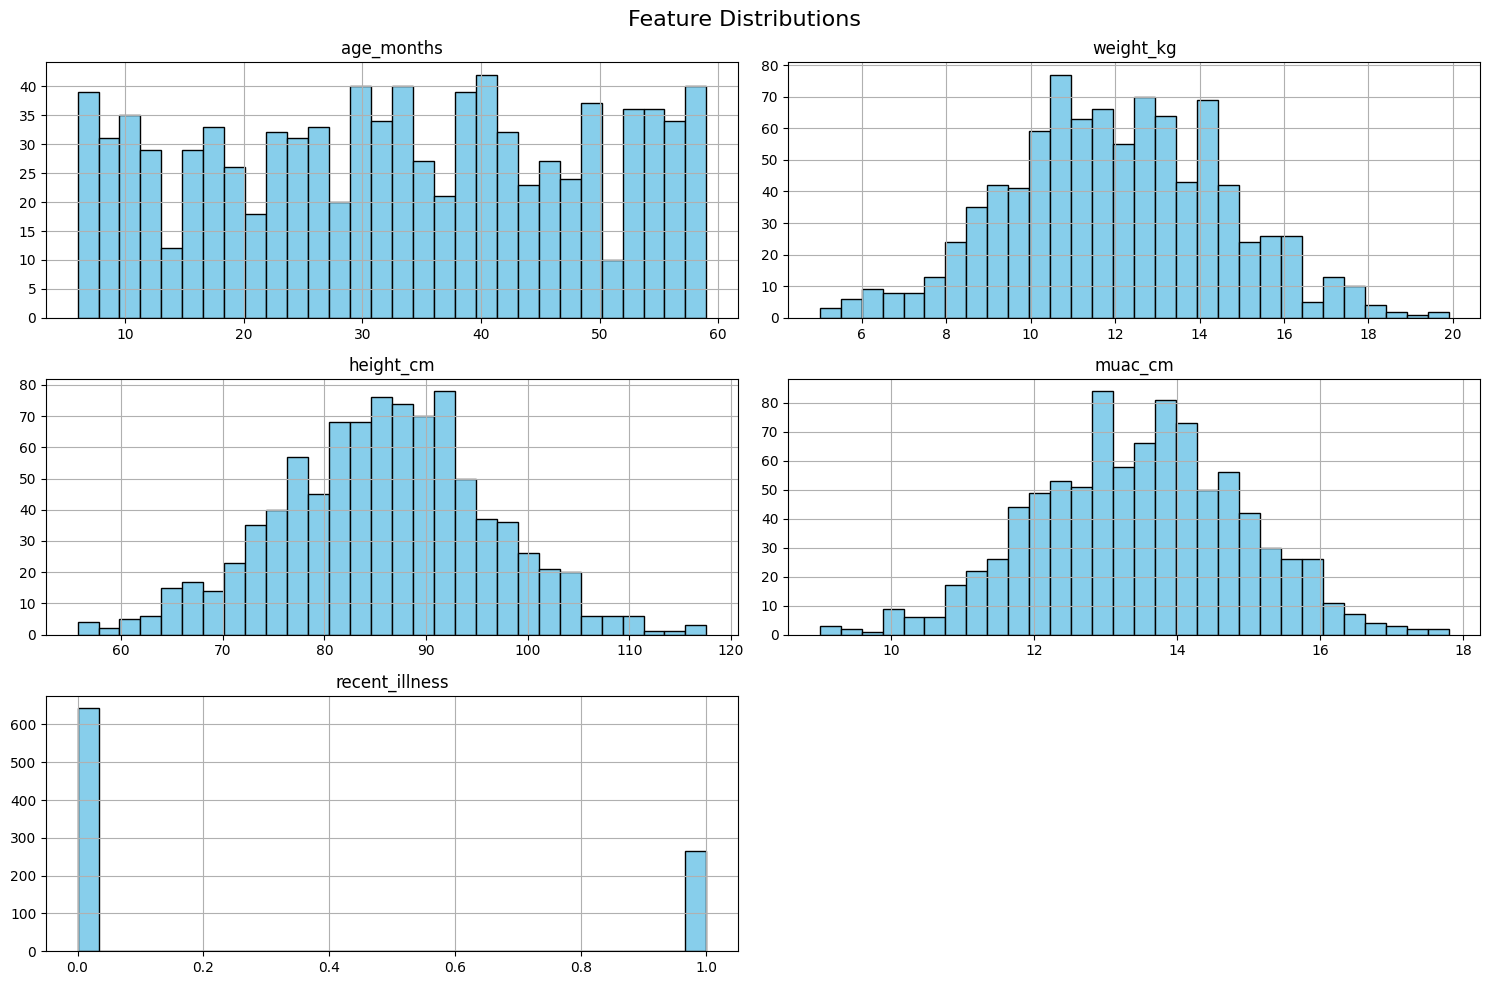

In [13]:
# Plot histograms for all numeric features
data.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()


#Boxplots for Outlier Detection

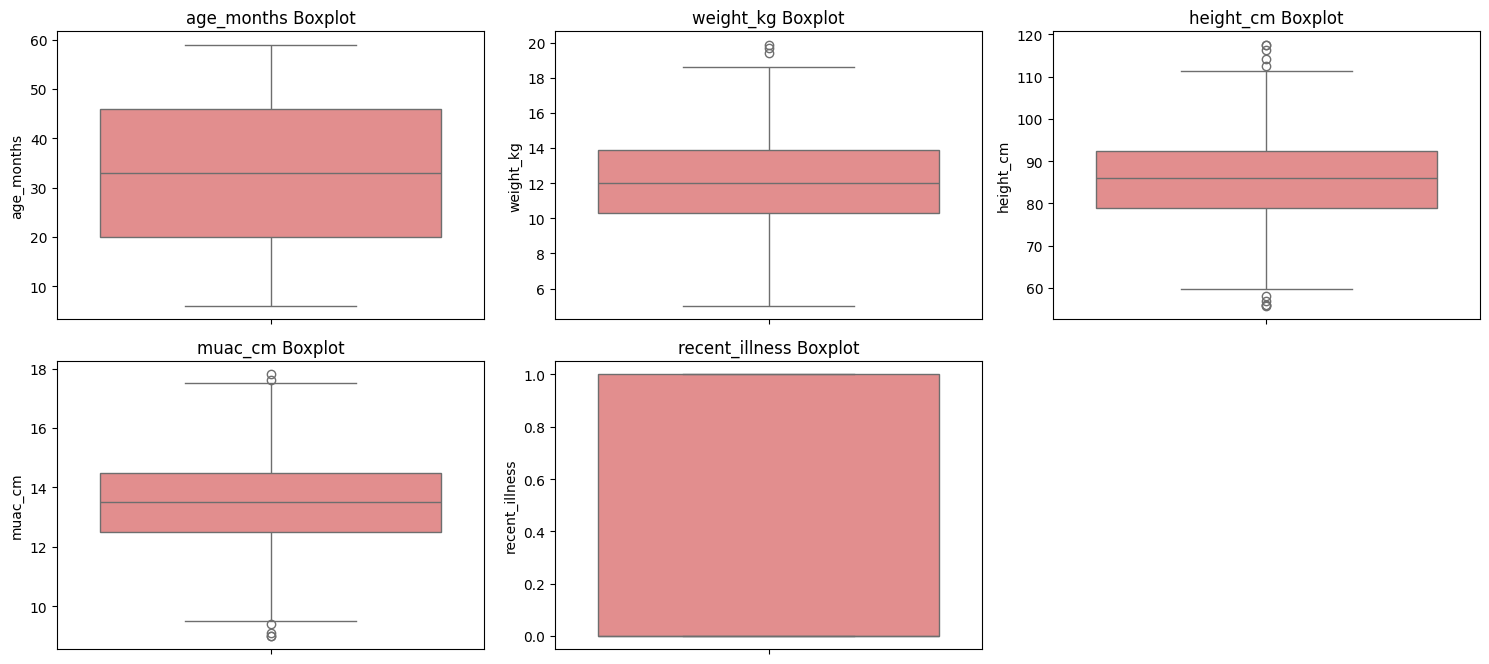

In [14]:
# Boxplots for numeric columns to detect outliers
numeric_cols = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data[col], color='lightcoral')
    plt.title(f'{col} Boxplot')
    plt.tight_layout()

plt.show()


#Correlation Heatmap

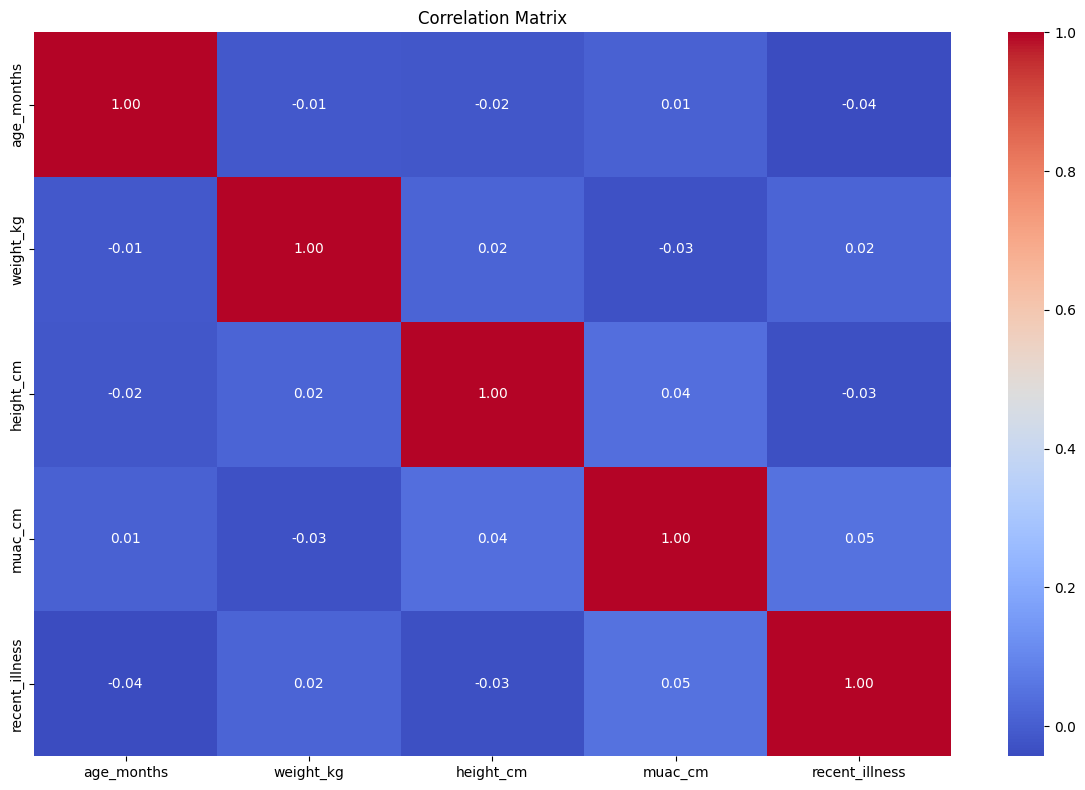

In [15]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


#Unique Values in Categorical Columns

In [16]:
# Look at unique values for each object column
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\nUnique values in {col}: {data[col].unique()}")



Unique values in gender: ['Male' 'Female']

Unique values in immunization_status: ['Complete' 'Partial']

Unique values in nutrition_status: ['Normal' 'At Risk' 'Malnourished']


#One-Hot Encode Categorical Features

In [17]:
#  encode 'gender' and 'immunization_status'
data = pd.get_dummies(data, columns=['gender', 'immunization_status'], drop_first=True)

# Print shape to confirm
print(f"\nNew shape after encoding: {data.shape}")



New shape after encoding: (910, 8)


In [19]:
from google.colab import files
files.download('data/processed/malnutrition_clean.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>